# Neural Networks Tasks in NLP

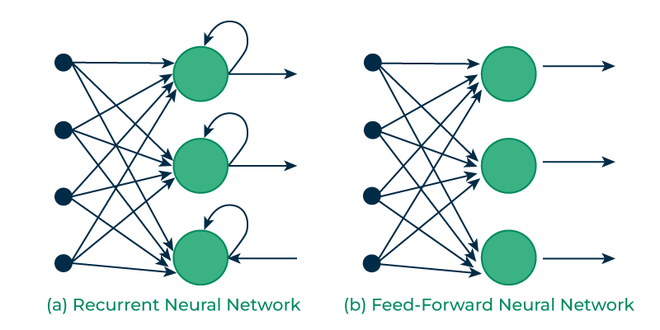

In BinaryClassification task:
* Binary Cross-Entropy Loss function that outputs a probability score between 0 and 1 for two classes
* a Sigmoid activation function is commonly used to produce output in the range [0,1], representing probabilities of belonging to one of the two classes.

In Multi-class classification task:
* Categorical Cross-Entropy Loss function that outputs a probability distribution over multiple classes.
* a softmax activation function is typically used to produce a probability distribution over multiple classes.



# Setup

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN
import numpy as np


In [2]:
# Parameters for the model and training
max_features = 10000  # Number of words to consider as features
maxlen = 500  # Cut texts after this number of words
batch_size = 32
embedding_dim = 50
epochs = 5


In [3]:
# Load IMDB data
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')


Loading data...
17464789/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences


In [4]:
# Pad sequences to fixed length
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)


Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


# Binary classification model


In [5]:
binary_model = Sequential()
binary_model.add(Embedding(max_features, embedding_dim))
binary_model.add(SimpleRNN(32)) # 32 refers to the number of units/neurons in the layer
                                # also the output vector of this layer will be of size 32
binary_model.add(Dense(1, activation='sigmoid'))


In [6]:
# Compile and train binary classification model
binary_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
print(binary_model.summary())
binary_model.fit(input_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 50)          500000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2656      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 502689 (1.92 MB)
Trainable params: 502689 (1.92 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/5
625/625 [==============================] - 71s 111ms/step - loss: 0.5421 - acc: 0.7121 - val_loss: 0.4243 - val_acc: 0.8178
Epoch 2/5
625/625 [==============================] - 67s 107ms/step - loss: 0.3598 - acc: 0.8551 - val_loss: 0.3834 - val_acc: 0.8366
Epoch 3/5
6

# Multiclass classification model


In [7]:

multiclass_model = Sequential()
multiclass_model.add(Embedding(max_features, embedding_dim))
multiclass_model.add(SimpleRNN(32))
multiclass_model.add(Dense(3, activation='softmax'))  # Assuming 3 classes


In [ ]:

# Compile and train multiclass classification model
multiclass_model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
print(multiclass_model.summary())
multiclass_model.fit(input_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 50)          500000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                2656      
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                                 
Total params: 502755 (1.92 MB)
Trainable params: 502755 (1.92 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/5
625/625 [==============================] - 69s 109ms/step - loss: 0.5842 - acc: 0.6897 - val_loss: 0.4264 - val_acc: 0.8190
Epoch 2/5
625/625 [==============================] - 68s 109ms/step - loss: 0.4048 - acc: 0.8303 - val_loss: 0.4842 - val_acc: 0.7934
Epoch 3/5

# Multilabel classification model


In [ ]:

multilabel_model = Sequential()
multilabel_model.add(Embedding(max_features, embedding_dim))
multilabel_model.add(SimpleRNN(32))
multilabel_model.add(Dense(1, activation='sigmoid'))  # One output neuron per label


In [ ]:

# Compile and train multilabel classification model
multilabel_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
print(multilabel_model.summary())
multilabel_model.fit(input_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)


# Testing the models

In [ ]:
def preprocess_text(text, maxlen=maxlen):
    # Tokenize text
    words = text.split()
    # Convert words to indices using the imdb word index
    word_index = imdb.get_word_index()
    indices = [word_index[word]
               if word in word_index
               and word_index[word] < max_features else 0 for word in words]
    # Pad sequences
    indices = sequence.pad_sequences([indices], maxlen=maxlen)
    return np.array(indices)


In [ ]:
text = "This movie was fantastic! I loved every moment of it."
processed_text = preprocess_text(text)


In [ ]:
binary_model.predict(processed_text)[0][0]
'''
The output of the predict() method for this model is a single floating-point number between 0 and 1,
 representing the probability that the input belongs to the positive class (class 1).
'''

In [ ]:
multiclass_model.predict(processed_text)[0]
'''
The output is an array of probabilities, with each element representing the probability of the input
belonging to a particular class.
The index of the highest probability in the array corresponds to the predicted class label.
'''

In [ ]:
multilabel_model.predict(preprocess_text(text))
'''
The output is an array of floating-point numbers between 0 and 1,
 with each element representing the probability that the input belongs to a particular label.
Each element in the array corresponds to one label, and the model outputs probabilities for each label independently.
'''

# Additional Resources

[RNNS for Sequence Learning](https://www.analyticsvidhya.com/blog/2020/10/recurrent-neural-networks-for-sequence-learning/)

[Intro to RNNs](https://www.analyticsvidhya.com/blog/2022/04/an-introduction-to-rnn-for-beginners/)

[More on RNNS how they work](https://www.analyticsvidhya.com/blog/2022/04/recurrent-neural-networks-digging-a-bit-deeper/)

[Visual Guid to RNNs](https://www.analyticsvidhya.com/blog/2021/06/a-visual-guide-to-recurrent-neural-networks/)

[Are RNNs that good?](https://www.guru99.com/rnn-tutorial.html)

[Activation Maps for DNN](https://towardsdatascience.com/activation-maps-for-deep-learning-models-in-a-few-lines-of-code-ed9ced1e8d21)

[Comparative Study of CNN and RNN for Natural Language Processing](https://arxiv.org/pdf/1702.01923.pdf)

[Recurrent Neural Networks (RNN) with Keras](https://www.tensorflow.org/guide/keras/rnn)

[Text Generation with RNN](https://www.tensorflow.org/text/tutorials/text_generation)

[Using masking](https://www.tensorflow.org/guide/keras/masking_and_padding)

[Lab reference 1](https://www.tensorflow.org/text/tutorials/text_classification_rnn)

[Lab reference 2](https://www.guru99.com/rnn-tutorial.html)
